In [1]:
import pandas as pd  # pandas module for data manipulation
import re # Regular expression operations
import matplotlib.pyplot as plt # module for plotting
import seaborn as sns # another module for plotting
import numpy as np
from sklearn.neighbors import KNeighborsClassifier #import KNeighborsClassifier
from sklearn.metrics import confusion_matrix #import confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV #import GridSearchCV
from sklearn.cluster import KMeans
plt.style.use('ggplot')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
# let's load the dataset
df = pd.read_csv('Cancer_Dataset.csv')
# let's inspect the first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Performing EDA

In [3]:
# mean, max & min across each attribute
df.describe()
# Describe function provides us min, max and mean of all the attributes in the dataset.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Checking the datatypes. so that we can modify them according to other dataset.
df.dtypes

Pregnancies         int64
Glucose             int64
BloodPressure       int64
SkinThickness       int64
Insulin             int64
BMI               float64
Cancer_Markers    float64
Age                 int64
Outcome             int64
dtype: object

In [5]:
df.shape

(768, 9)

 we have 768 rows and 9 columns. The first 8 columns represent the features and the last column represent the target/label.

#### *Looking at the Datatypes, any changes are not required.*


In [6]:
# we can quantify the total number of missing values using
# the isnull method plus the sum method on the dataframe
df.isna().sum()

Pregnancies       0
Glucose           0
BloodPressure     0
SkinThickness     0
Insulin           0
BMI               0
Cancer_Markers    0
Age               0
Outcome           0
dtype: int64

In [7]:
# Can Suger be 0, blood pressure be 0 ? Similarly for Skin Thickness, Insulin,BMI and age.
# So, replacing those attributes which has O(zero) values to the mean of that column.

for i, feature in enumerate(df.columns):
    if feature not in ("Pregnancies","Cancer_Markers","Outcome"):
        df[feature].replace(0,df[feature].median(axis=0),inplace=True)
        
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


In [8]:
# Checking the datatypes. so that we can modify them according to other dataset.
df.dtypes

Pregnancies         int64
Glucose             int64
BloodPressure       int64
SkinThickness       int64
Insulin           float64
BMI               float64
Cancer_Markers    float64
Age                 int64
Outcome             int64
dtype: object

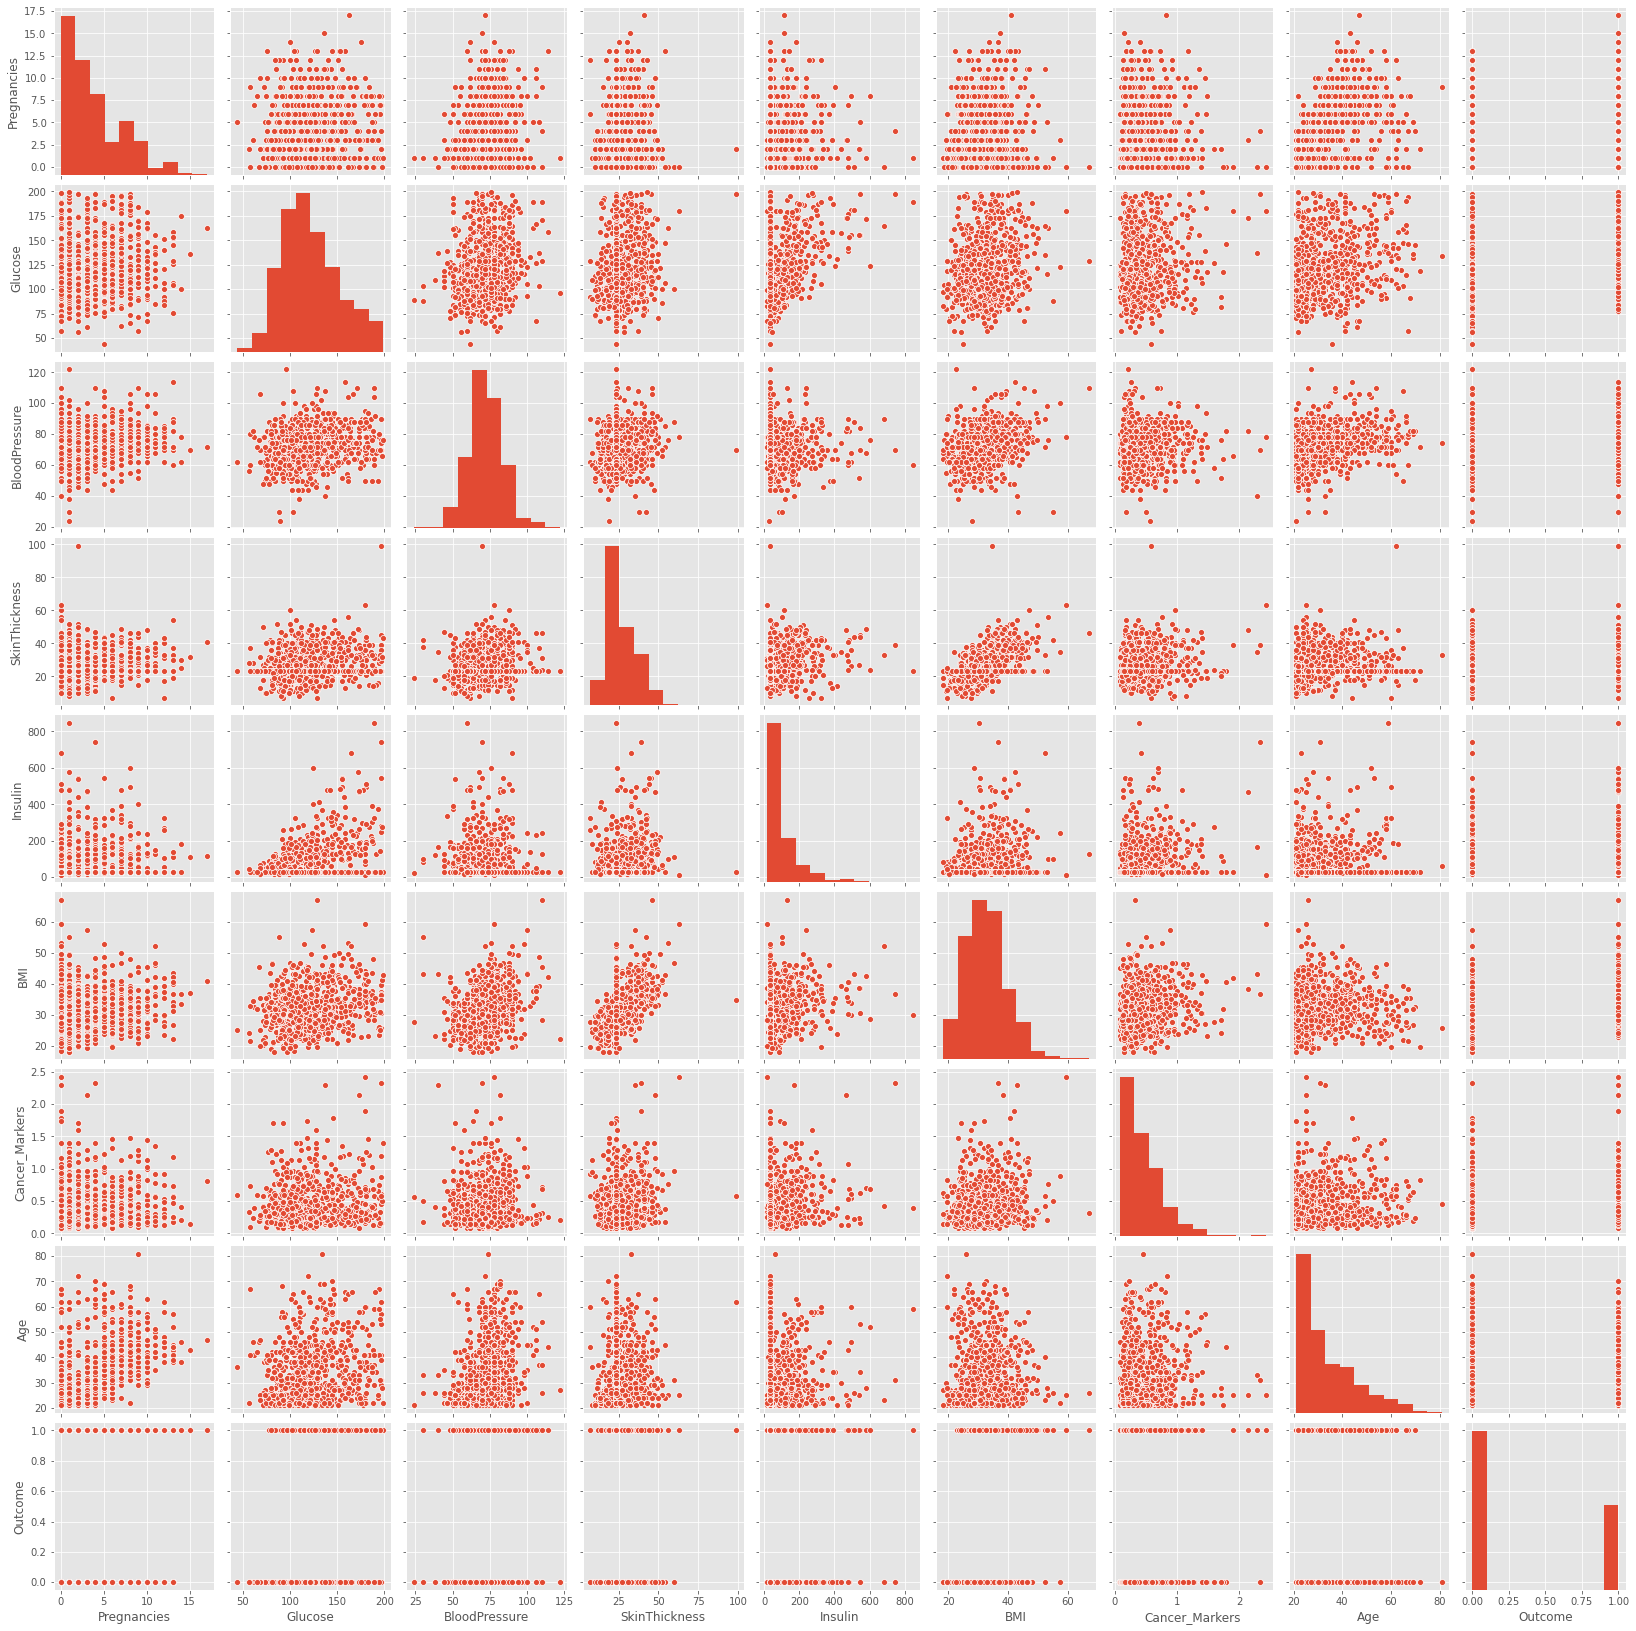

In [9]:
# Create the default pairplot
sns.pairplot(df)

**Now We are gonna draw Histograms for all the features using seaborn library.**

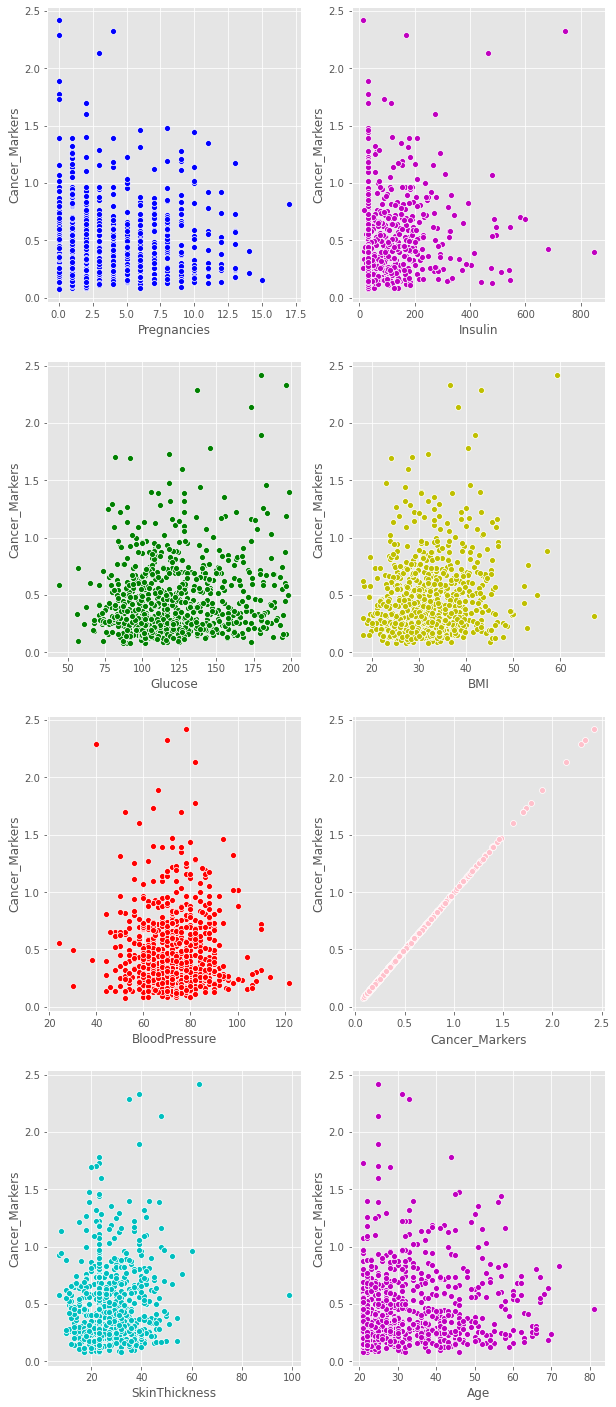

In [11]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'pink','m', 'y', 'pink']

# defining the plot area into 3 rows and 2 columns with each plot size with 10x10 size.
# sharex=False represents, they don't share the common X axis.
# precisely, every feature's x-axis is independent of itself
# Number of rows of plots
n=4
f, axes = plt.subplots(n,2, figsize=(10, 25), sharex=False)
for i, feature in enumerate(df.columns):
        # displot takes first argument as column name to represent the graph
        # color here is displayed using Array
        # ax specifies the plot block where it needs to get rendered.
        if feature not in ("Outcome"):
            #Drawing the seaborn plot for each attribute against Cancer Markers
            sns.scatterplot(x=feature, y="Cancer_Markers", data=df, color=colors[i], ax=axes[i%n, i//n])
            

**Now We are gonna plot Heatmap for all the features using seaborn library.**

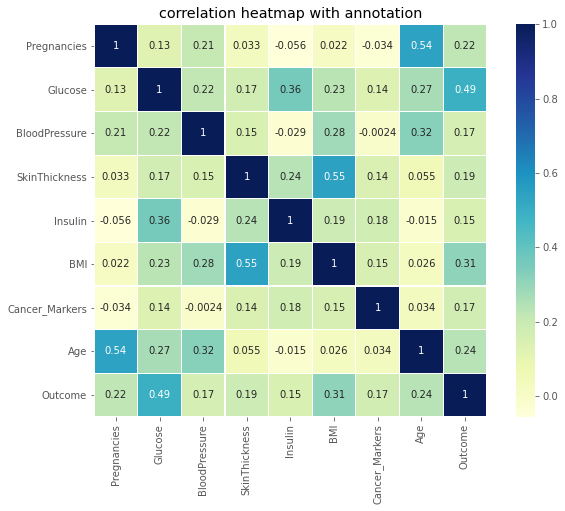

In [10]:
# taking the number of columns in a dataframe
n=df.shape[1]
# Defining the plot size 
fig, axs = plt.subplots(figsize = (8, 12))
# specifying some more attributes to adjust the heat map
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0.2)
plt.subplot(2, 1, 1)
# correlation heatmap with annotation
sns.heatmap(df.corr(), linewidths = 0.1, square = True, annot = True, cmap = "YlGnBu")
plt.ylim(n, 0)
plt.xlim(0, n)
plt.title("correlation heatmap with annotation")
plt.show()

### As we can see the correlation between any two attributes is maximum of 50% i.e., between age and Pregnancies.<br />We can clearly say that all the attributes are independent of each other and we can consider all of them to furthur process

###### Scaling the data

In [12]:
#creating arrays for attributes and class
X = df.drop('Outcome',axis=1)
y = df['Outcome'].values

In [13]:
# Scaling the Data so that computations will be much faster and also easily understood by machine while computing
column_names = X.columns
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=column_names)

# Lets Start building KNN

In [14]:
# Splitting data into test and train sets 
# Stratify = y is used to split the training and testing data sets uniformly
# we are splitting training and testing data sets into 70-30 ratio.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [15]:
# Arrays to store training and test accuracies
neighbors = np.arange(1,15)
train_set_accuracy =np.empty(len(neighbors))
test_set_accuracy = np.empty(len(neighbors))
error = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    #Fitting the model
    knn_model.fit(X_train, y_train)
    
    #Training set needs to be computed for accuracy
    train_set_accuracy[i] = knn_model.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_set_accuracy[i] = knn_model.score(X_test, y_test) 
    test_set_accuracy[i]
    print("test_set_accuracy of ",i+1, ": ", test_set_accuracy[i])

test_set_accuracy of  1 :  0.7229437229437229
test_set_accuracy of  2 :  0.7229437229437229
test_set_accuracy of  3 :  0.70995670995671
test_set_accuracy of  4 :  0.7056277056277056
test_set_accuracy of  5 :  0.7316017316017316
test_set_accuracy of  6 :  0.7229437229437229
test_set_accuracy of  7 :  0.7359307359307359
test_set_accuracy of  8 :  0.7186147186147186
test_set_accuracy of  9 :  0.7142857142857143
test_set_accuracy of  10 :  0.7229437229437229
test_set_accuracy of  11 :  0.7402597402597403
test_set_accuracy of  12 :  0.7532467532467533
test_set_accuracy of  13 :  0.7359307359307359
test_set_accuracy of  14 :  0.7359307359307359


### Elbow Plot generation

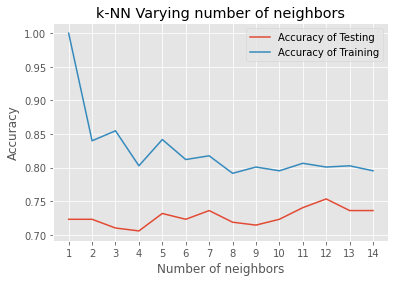

In [16]:
#plot generation

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_set_accuracy, label='Accuracy of Testing')
plt.plot(neighbors, train_set_accuracy, label='Accuracy of Training')
plt.xticks(range(1, 15))
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### Plotting the Elbow Curve using Inertia

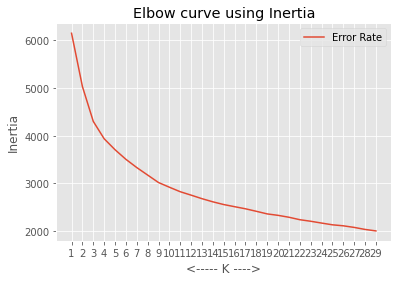

In [29]:
inertias = [];
neighbours = range(1,30)
for k in neighbours:
    kMeanModel = KMeans(n_clusters=k)
    kMeanModel.fit(X)
    inertias.append(kMeanModel.inertia_)

plt.title('Elbow curve using Inertia')
plt.plot(neighbours, inertias, label='Error Rate')
plt.xticks(neighbours)
plt.legend()
plt.xlabel('<----- K ---->')
plt.ylabel('Inertia')
plt.show()

##### We can see, at k=12 the distance between the curves is minimal

In [19]:
#knn classifier with k neighbors
knn_model2 = KNeighborsClassifier(n_neighbors=12)
#Fitting the model
knn_model2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [20]:
# classification algorithms score method represents accuracy.
knn_model2.score(X_test,y_test)

0.7532467532467533

# Model performance Analysis

### Confusion Matrix

**A confusion matrix is a table that is used to describe the performance of a classification model**
**we use the confusion_matrix method from Scikit-learn**

In [21]:
# predictions using the KNN classifier that we fit in the above steps
y_pred = knn_model2.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[134,  16],
       [ 41,  40]])

In [22]:
# We have a method in pandas library to find confusion matrix. corsstab. 
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,134,16,150
1,41,40,81
All,175,56,231


### Confusion matrix Explaination

- Out of 150, 134 patients are predicted by the classifier saying they are **not susceptible** to cancer and they turned out to be correct which is **Ture Positive**
- Out of 81, 40 persons are predicted by the classifier saying they are **susceptible** to cancer and they turned out to be correct which is **True Negative**
- Out of 150, 16 persons are wrongly predicted by the classifier saying they are **susceptible** to cancer and they turned out to be not correct which is **False Negative**
- Out of 81, 41 persons are wrongly predicted by the classifer saying they are **not susceptible** to cancer and they turned out to be not correct which is **False Positive**

### Classification Report

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       150
           1       0.71      0.49      0.58        81

    accuracy                           0.75       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.75      0.75      0.74       231



## ROC (Reciever Operating Charecteristic) curve

In [24]:
y_pred_prob = knn_model2.predict_proba(X_test)[:,1]
y_predict= knn_model2.predict(X_test)
for i in range(100):
    print(y_test[i],y_predict[i],y_pred_prob[i])
    print(" ")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

1 0 0.25
 
1 0 0.5
 
1 1 0.75
 
1 0 0.5
 
1 0 0.3333333333333333
 
0 0 0.08333333333333333
 
0 1 0.6666666666666666
 
0 0 0.08333333333333333
 
0 0 0.0
 
0 0 0.25
 
0 0 0.0
 
0 0 0.0
 
0 0 0.08333333333333333
 
0 0 0.5
 
1 1 0.8333333333333334
 
1 1 0.75
 
1 0 0.25
 
0 0 0.16666666666666666
 
0 1 0.6666666666666666
 
0 0 0.25
 
0 0 0.3333333333333333
 
0 0 0.4166666666666667
 
0 0 0.0
 
0 0 0.0
 
0 1 0.75
 
0 0 0.25
 
1 0 0.4166666666666667
 
1 0 0.16666666666666666
 
0 0 0.16666666666666666
 
0 0 0.0
 
1 1 0.5833333333333334
 
1 1 0.6666666666666666
 
0 0 0.16666666666666666
 
0 0 0.08333333333333333
 
0 0 0.0
 
1 1 0.6666666666666666
 
0 0 0.16666666666666666
 
1 0 0.4166666666666667
 
0 0 0.08333333333333333
 
0 0 0.4166666666666667
 
0 0 0.08333333333333333
 
1 1 0.8333333333333334
 
0 0 0.0
 
0 0 0.0
 
0 0 0.0
 
1 1 0.5833333333333334
 
0 0 0.3333333333333333
 
1 1 0.6666666666666666
 
0 0 0.25
 
0 0 0.0
 
0 0 0.0
 
0 0 0.25
 
1 1 0.6666666666666666
 
0 0 0.08333333333333333
 
1 1

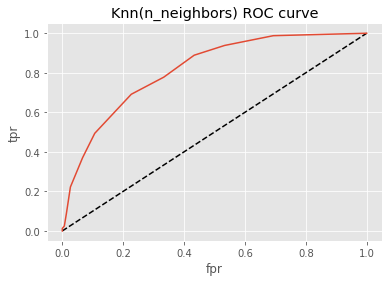

In [28]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors) ROC curve')
plt.show()

In [26]:
#Area under ROC curve
roc_auc_score(y_test,y_pred_prob)

0.8146913580246913

##### So, we can see 81% of the area is covered under the ROC curve. <br />By which we can say our model server 81% of the probability that the outcome of the classifier would be correct.

In [27]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7800271623801034
Best Parameters: {'n_neighbors': 19}
